In [18]:
sys.path.insert(0, '../../Libraries')
from ltar import LTAR
import numpy as np
import pandas as pd
import numpy.random as random
import scipy.fft as sfft
import pywt
import JacksonsTSPackage as jts
from ltar import *
from statsmodels.tsa.api import VAR

In [19]:
def mul_ten_and_mat(tensor, matrix):
    
    matrix_shape = matrix.shape
    ten_length = len(tensor)
    ten_sqr = ten_length*ten_length
    block_matrix = np.zeros((ten_sqr, ten_sqr))

    # Makes the block vector
    trans_vector = sfft.dct(matrix, axis=1)
    block_vector = trans_vector.transpose().reshape(ten_sqr)

    # Makes the block matrix
    transform_tensor = sfft.dct(tensor, axis=0)
    for i in range(ten_length):
        c = i * 3
        block_matrix[c:c+3,c:c+3] = transform_tensor[i]

    result_block_vector = np.matmul(block_matrix, block_vector)
    result_trans_matrix = result_block_vector.reshape(matrix_shape).transpose()
    result_matrix = sfft.idct(result_trans_matrix, axis=1)

    return result_matrix

N = 2000

A = np.array([
    [
        [0.4, 0, 0],
        [0, 0.4, 0],
        [0, 0, 0.4]
    ],
    [
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]
    ],
    [
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]
    ]
    ])

c = np.array(
    [[0.8, 0, 0],
    [0, 0, 0.8],
    [0, 0.8, 0]])

T = np.array(
    [[1, -1, 1],
    [1, 1, -1],
    [-1, 1, 1]])

tmp = np.array(
    [
        [0.1, 0.2, 0.3],
        [0.4, 0.5, 0.6],
        [0.7, 0.8, 0.9]
    ])

data_tensor = np.zeros((N, 3, 3))
data_tensor[0] = tmp
for i in range(1, N):
    data_tensor[i] = c + mul_ten_and_mat(A, data_tensor[i-1]) + 0.001*i*T + random.uniform(-1, 1, (3, 3))
data_tensor.shape

(2000, 3, 3)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

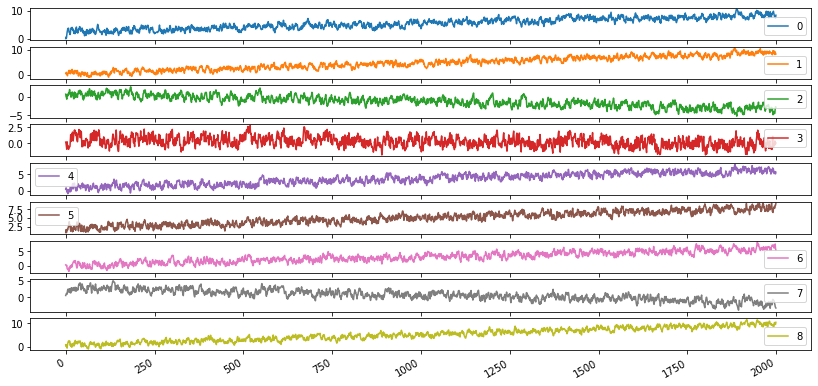

In [20]:
vectorized = pd.DataFrame(jts.tensor_to_vector(data_tensor))
vectorized.plot(figsize = (14, 7), subplots = True)

In [21]:
import pywt
A,B = pywt.dwt(data_tensor, "haar", axis=2)
result = np.append(A, B, axis=2)
result.shape

(2000, 3, 4)

In [26]:
C,D = np.split(result, 2, axis=2)
iresult = pywt.idwt(C,D, "haar", axis=2)
iresult.shape

(2000, 3, 4)

RuntimeError: C inverse wavelet transform failed

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

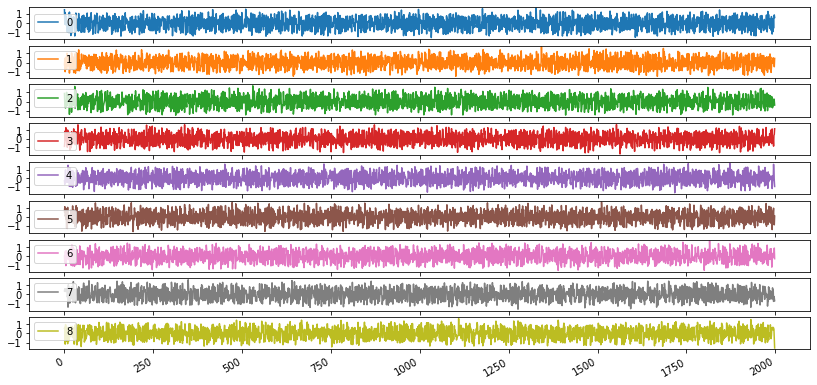

In [4]:
diff_tensor = diff(data_tensor)
vectorized = pd.DataFrame(jts.tensor_to_vector(diff_tensor))
vectorized.plot(figsize = (14, 7), subplots = True)

In [ ]:
def invert_diff(tensor, y0, interval = 1):

    shape = tensor.shape

    if len(shape) != 3:
        raise ValueError(f"{len(train.shape)} is in invalid tensor order. Only 3rd order tensors are valid with this class")

    if len(y0.shape) != 2:
        raise ValueError(f"{len(y0.shape)} is in invalid y0 order. Only 2nd order tensors are valid with this class")

    invert = np.zeros((shape[0] + interval, shape[1], shape[2]))

    for i in range(len(invert)):
        

    return invert